## Research Question

#### What is the relationship between the Green Spaces and Happiness by Borough?

##### Data sources:
##### Green_cover_borough_2018: London DataStore
##### Personal_well_being_borough_2011-2019: London DataStore

### 1. Loading the Data

In [1]:
import pandas as pd

In [2]:
green_df = pd.read_excel('green_cover_borough.xlsx', sheet_name = 'borough_green_cover')
mental_df = pd.read_excel('personal-well-being-borough.xlsx', sheet_name = 'Summary - Mean Scores')

In [3]:
green_df.head()

,lb_code,lb_name,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue
0,City of London,E09000001,314.943,17.608124,24.314219,41.922343,5.590892,7.720197,13.311089
1,Barking and Dagenham,E09000002,3779.934,1481.778293,230.504239,1712.282532,39.201168,6.098102,45.299271
2,Barnet,E09000003,8674.835,5030.909762,60.010101,5090.919864,57.994299,0.691772,58.686071
3,Bexley,E09000004,6428.647,2759.068177,437.519987,3196.588165,42.918334,6.805786,49.724120
4,Brent,E09000005,4323.270,1726.558641,44.586523,1771.145164,39.936406,1.031315,40.967720


In [4]:
mental_df.head()

,,Unnamed: 1,Life Satisfaction,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Anxiety,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Code,Area,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,...,2018/19,NaN,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000001,City of London,x,x,x,x,x,x,NaN,NaN,...,x,NaN,x,x,x,x,x,x,x,x
3,E09000002,Barking and Dagenham,7.05,7.09,7.01,7.32,7.45,7.5,7.66,7.52,...,7.67,NaN,3.23,3.27,3.39,3.15,2.84,3.02,2.85,2.82
4,E09000003,Barnet,7.43,7.28,7.4,7.54,7.53,7.47,7.63,7.55,...,7.44,NaN,3.41,2.74,2.6,2.37,2.49,3.09,2.78,3.19


### 2.1 Cleaning mental_df

In [5]:
#Selecting headers
mental_df = pd.read_excel('personal-well-being-borough.xlsx', 
                          sheet_name = 'Summary - Mean Scores', 
                          header=[0,1], 
                          skiprows=[2])

mental_df.head()

Life Satisfaction                          \
        Code                  Area           2011/12 2012/13 2013/14 2014/15   
0  E09000001        City of London                 x       x       x       x   
1  E09000002  Barking and Dagenham              7.05    7.09    7.01    7.32   
2  E09000003                Barnet              7.43    7.28     7.4    7.54   
3  E09000004                Bexley              7.42    7.42    7.28    7.52   
4  E09000005                 Brent              7.11    7.28    7.41    7.24   

                                   ... Happiness           Anxiety          \
  2015/16 2016/17 2017/18 2018/19  ...   2018/19 2018/19.1 2011/12 2012/13   
0       x       x     NaN     NaN  ...         x       NaN       x       x   
1    7.45     7.5    7.66    7.52  ...      7.67       NaN    3.23    3.27   
2    7.53    7.47    7.63    7.55  ...      7.44       NaN    3.41    2.74   
3    7.41    7.46    7.42    7.54  ...      7.55       NaN    3.07    3.24   
4    7.55    7.67    7.79    7.71  ...      7.84       NaN    2.77    3.29   

                                                   
  2013/14 2014/15 2015/16 2016/17 2017/18 2018/19  
0       x       x       x       x       x       x  
1    3.39    3.15    2.84    3.02    2.85    2.82  
2     2.6    2.37    2.49    3.09    2.78    3.19  
3    3.46    3.16    3.06    3.16    3.04    3.21  
4    3.07     2.5    2.57    2.69     2.7     2.4  

[5 rows x 37 columns]

In [6]:
mental_df.columns.tolist()

[(' ', 'Code'),
 (' ', 'Area'),
 ('Life Satisfaction', '2011/12'),
 ('Life Satisfaction', '2012/13'),
 ('Life Satisfaction', '2013/14'),
 ('Life Satisfaction', '2014/15'),
 ('Life Satisfaction', '2015/16'),
 ('Life Satisfaction', '2016/17'),
 ('Life Satisfaction', '2017/18'),
 ('Life Satisfaction', '2018/19'),
 ('Life Satisfaction', '2018/19.1'),
 ('Worthwhile', '2011/12'),
 ('Worthwhile', '2012/13'),
 ('Worthwhile', '2013/14'),
 ('Worthwhile', '2014/15'),
 ('Worthwhile', '2015/16'),
 ('Worthwhile', '2016/17'),
 ('Worthwhile', '2017/18'),
 ('Worthwhile', '2018/19'),
 ('Worthwhile', '2018/19.1'),
 ('Happiness', '2011/12'),
 ('Happiness', '2012/13'),
 ('Happiness', '2013/14'),
 ('Happiness', '2014/15'),
 ('Happiness', '2015/16'),
 ('Happiness', '2016/17'),
 ('Happiness', '2017/18'),
 ('Happiness', '2018/19'),
 ('Happiness', '2018/19.1'),
 ('Anxiety', '2011/12'),
 ('Anxiety', '2012/13'),
 ('Anxiety', '2013/14'),
 ('Anxiety', '2014/15'),
 ('Anxiety', '2015/16'),
 ('Anxiety', '2016/17'),
 (

In [7]:
#Selecting relevant columns
mental_df_clean = mental_df[[
    (' ', 'Area'),('Happiness', '2018/19')]].copy()

mental_df_clean.head(3)

,,Happiness
,Area,2018/19
0,City of London,x
1,Barking and Dagenham,7.67
2,Barnet,7.44


In [8]:
#Flattening the headers - removing MultiIndex
#Fixing the index from (' ','Area') to ('Area') 
#Fixing the index from ('Happiness', '2018/19') to ('2018/19')       

In [9]:
type(mental_df_clean.columns)

pandas.core.indexes.multi.MultiIndex

In [10]:
mental_df_clean.columns = mental_df_clean.columns.get_level_values(1)

In [11]:
mental_df_clean.columns.tolist()

['Area', '2018/19']

In [12]:
mental_df_clean.head(3)

,Area,2018/19
0,City of London,x
1,Barking and Dagenham,7.67
2,Barnet,7.44


In [13]:
mental_df = mental_df_clean

#Renaming headers
mental_df = mental_df.rename(columns={'Area' : 'Borough'})
mental_df = mental_df.rename(columns={'2018/19' : 'Happiness'})

In [14]:
mental_df.tail(20)

,Borough,Happiness
30,Waltham Forest,7.51
31,Wandsworth,7.5
32,Westminster,7.38
33,NaN,NaN
34,North East,7.5
35,North West,7.54
36,Yorkshire and The Humber,7.49
37,East Midlands,7.58
38,West Midlands,7.54
39,East of England,7.62


In [15]:
#Removing rows which show regions not boroughs
mental_df = mental_df.iloc[:33].copy()

mental_df #Final clean mental_df

,Borough,Happiness
0,City of London,x
1,Barking and Dagenham,7.67
2,Barnet,7.44
3,Bexley,7.55
4,Brent,7.84
5,Bromley,7.47
6,Camden,7.38
7,Croydon,7.78
8,Ealing,7.61
9,Enfield,7.35


### 2.2 Cleaning green_df

In [16]:
green_df.head()

,lb_code,lb_name,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue
0,City of London,E09000001,314.943,17.608124,24.314219,41.922343,5.590892,7.720197,13.311089
1,Barking and Dagenham,E09000002,3779.934,1481.778293,230.504239,1712.282532,39.201168,6.098102,45.299271
2,Barnet,E09000003,8674.835,5030.909762,60.010101,5090.919864,57.994299,0.691772,58.686071
3,Bexley,E09000004,6428.647,2759.068177,437.519987,3196.588165,42.918334,6.805786,49.724120
4,Brent,E09000005,4323.270,1726.558641,44.586523,1771.145164,39.936406,1.031315,40.967720


In [17]:
#Renaming headers
green_df = green_df.rename(columns={
    'lb_code': 'Borough',
    'percent_green':'Percent Green Areas'
})

#Renaming City of Westminster to match mental_df
green_df['Borough'] = green_df['Borough'].replace({
    'City of Westminster': 'Westminster'
})

In [18]:
#Selecting relevant columns
green_df= green_df[['Borough', 'Percent Green Areas']].copy()

green_df # Final clean green_df

,Borough,Percent Green Areas
0,City of London,5.590892
1,Barking and Dagenham,39.201168
2,Barnet,57.994299
3,Bexley,42.918334
4,Brent,39.936406
5,Bromley,68.356138
6,Camden,43.278949
7,Croydon,55.527790
8,Ealing,43.958704
9,Enfield,52.952754


### 3.Merging

In [30]:
#Merging by borough
merged_df = pd.merge(mental_df, green_df, on = 'Borough', how='inner')
merged_df.head(3)

,Borough,Happiness,Percent Green Areas
0,City of London,x,5.590892
1,Barking and Dagenham,7.67,39.201168
2,Barnet,7.44,57.994299


In [27]:
#Removing non-numeric rows i.e. City of London
merged_df.loc[:, 'Happiness'] = pd.to_numeric(merged_df['Happiness'], errors='coerce')
merged_df = merged_df.dropna(subset=['Happiness'])
merged_df.head()

,Borough,Happiness,Percent Green Areas
1,Barking and Dagenham,7.67,39.201168
2,Barnet,7.44,57.994299
3,Bexley,7.55,42.918334
4,Brent,7.84,39.936406
5,Bromley,7.47,68.356138


### 4. Visualizing

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

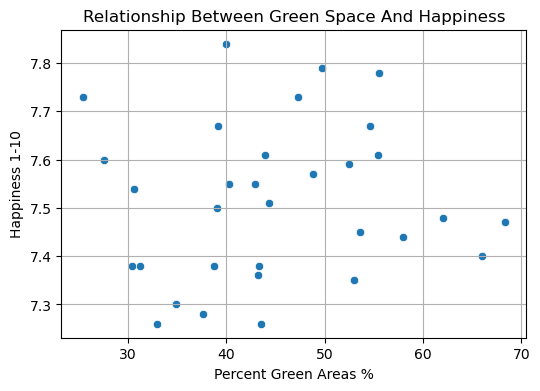

In [60]:
#Making scatter plot

plt.figure(figsize=(6,4))
sns.scatterplot(data=merged_df, x='Percent Green Areas', y='Happiness')

plt.title('Relationship Between Green Space And Happiness')
plt.xlabel('Percent Green Areas %')
plt.ylabel('Happiness 1-10')
plt.grid(True)
plt.show()

In [52]:
import numpy as np

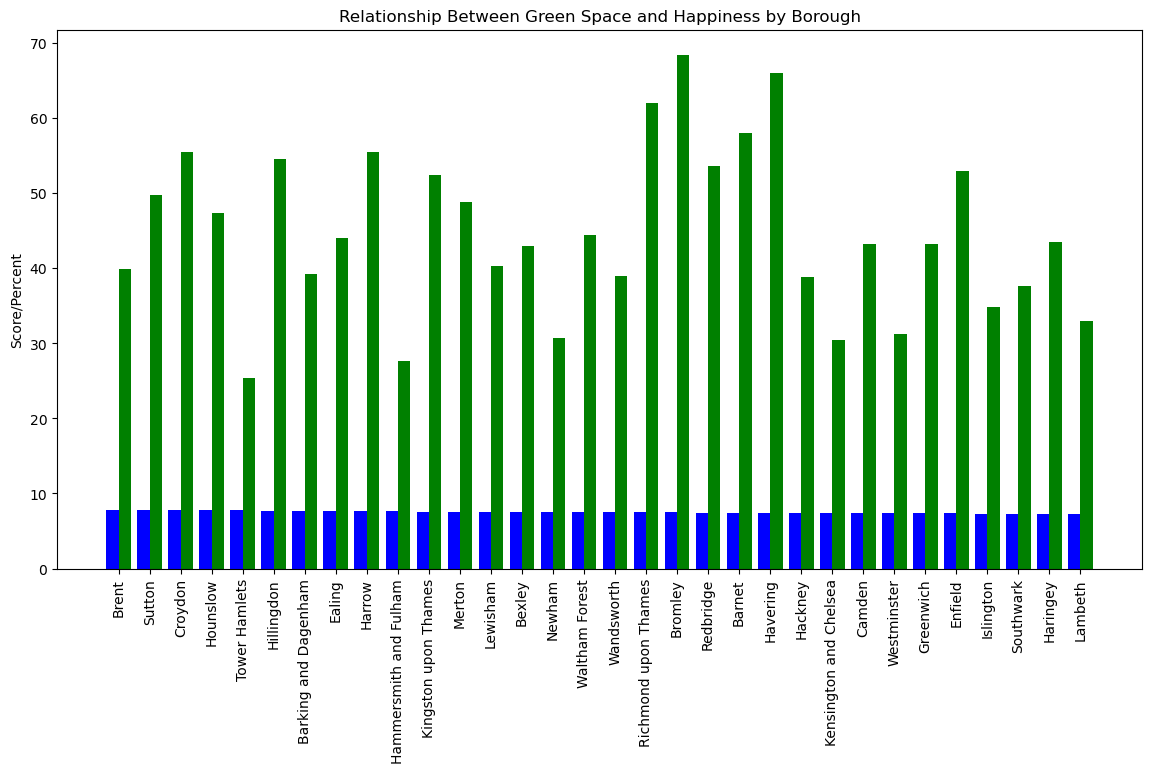

In [61]:
#Making bar chart to show variation by borough

merged_sorted = merged_df.sort_values(by='Happiness', ascending = False)

x = np.arange(len(merged_sorted))
width = 0.4

plt.figure(figsize=(14,7))
plt.bar(x - width/2, merged_sorted['Happiness'], width, label='Happiness', color='blue')
plt.bar(x + width/2, merged_sorted['Percent Green Areas'], width, label='Percent Green Areas', color='green')

plt.xticks(x, merged_sorted['Borough'], rotation=90)
plt.title('Relationship Between Green Space and Happiness by Borough')
plt.ylabel('Score/Percent')
plt.show()

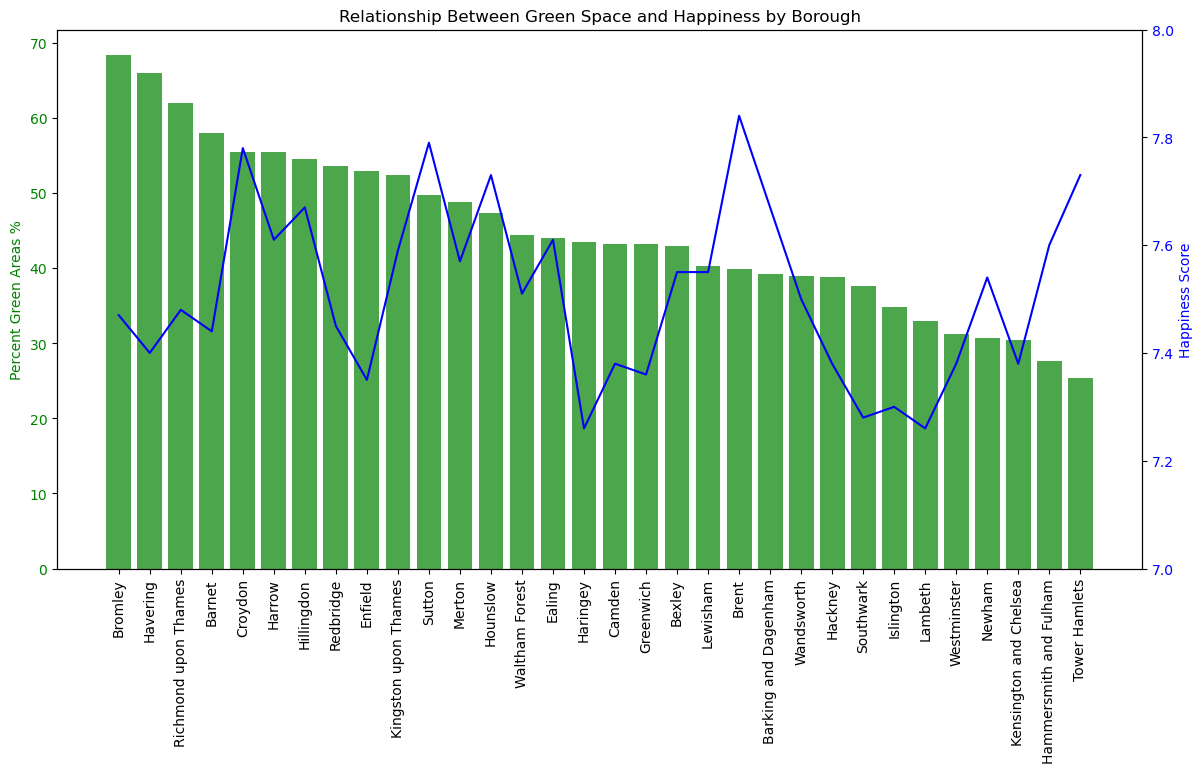

In [75]:
#Making bar chart with two y axis to capture difference in magnitude and measures

merged_sorted = merged_df.sort_values(by='Percent Green Areas', ascending = False)

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.bar(merged_sorted['Borough'], merged_sorted['Percent Green Areas'], color = 'green', alpha = 0.7)
ax1.set_ylabel('Percent Green Areas %', color='green')
ax1.tick_params(axis='y', labelcolor = 'green')
ax1.set_xticks(range(len(merged_sorted)))
ax1.set_xticklabels(merged_sorted['Borough'], rotation=90)

ax2 = ax1.twinx()
ax2.plot(merged_sorted['Borough'], merged_sorted['Happiness'], color = 'blue')
ax2.set_ylabel('Happiness Score', color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')

ax2.set_ylim(7,8)

plt.title('Relationship Between Green Space and Happiness by Borough')
plt.show()

#### No clear relationship between percent of green space and happiness